In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("BAAI/bge-m3")

sentences = [
    "That is a happy person",
    "That is a happy dog",
    "That is a very happy person",
    "Today is a sunny day"
]
embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)
# [4, 4]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

torch.Size([4, 4])


Image to text

In [ ]:
from PIL import Image

In [ ]:
image = Image.open('/content/SIRIUS-279293.jpg')

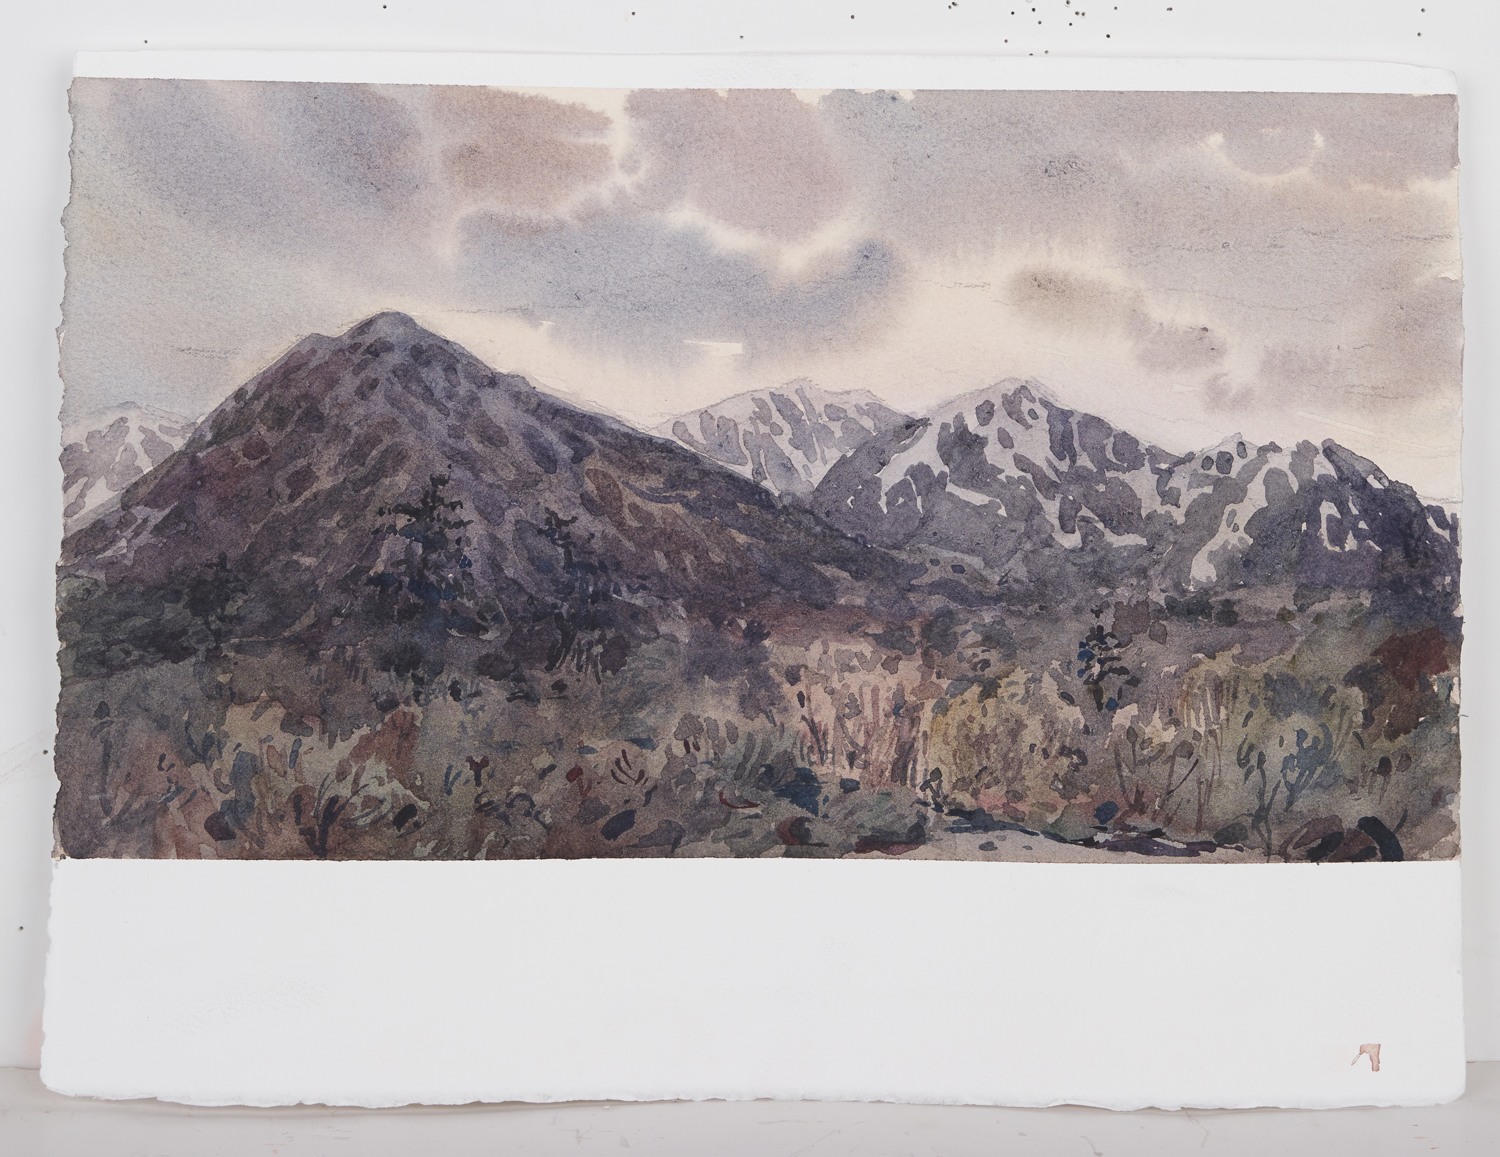

In [ ]:
image

In [ ]:
!pip install langchain_gigachat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
from langchain_gigachat.chat_models import GigaChat
from langchain_core.prompts import ChatPromptTemplate

Код для генерации описания изображения

In [ ]:
gigachat_token = 'ZTkxZjVmMGMtODQ0NS00ZTUwLWExY2QtYWJmMTJhMGY3MDVmOjE1NzJlMmE5LTc5ZmItNGVjMS04ZDJhLTMwNzE3NWQ2NjBmOA=='

giga = GigaChat(credentials=gigachat_token,
                model='GigaChat-Max',
                scope="GIGACHAT_API_CORP",
                verify_ssl_certs=False)

file = giga.upload_file(open("/content/drive/MyDrive/reestr/image_0.jpg", "rb"))

result = giga.chat(
    {
        "messages": [
            {
                "role": "user",
                "content": "Опиши, что изображено на картине",
                "attachments": ["1c3240f0-c697-4568-a93a-0895ff103c45"],
            }
        ],
        "temperature": 0.1
    }
)

print(result.choices[0].message.content)

На картине изображены горы с заснеженными вершинами и склонами. В нижней части изображения виден лес с деревьями, окрашенными в осенние тона. Небо покрыто облаками, создающими впечатление пасмурной погоды. Стиль живописи напоминает акварельные работы, с мягкими переходами цвета и легкой размытостью контуров.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/images_sirius_final.csv')

In [ ]:
data_2 = pd.read_csv('/content/drive/MyDrive/reestr/dataset_with_descriptions.csv')


In [ ]:
data_2.head(732)

image  \
0    https://tiu.api.picvar.io/api/v1/storage/get_f...   
1    https://tiu.api.picvar.io/api/v1/storage/get_f...   
2    https://tiu.api.picvar.io/api/v1/storage/get_f...   
3    https://tiu.api.picvar.io/api/v1/storage/get_f...   
4    https://tiu.api.picvar.io/api/v1/storage/get_f...   
..                                                 ...   
727  https://tiu.api.picvar.io/api/v1/storage/get_f...   
728  https://tiu.api.picvar.io/api/v1/storage/get_f...   
729  https://tiu.api.picvar.io/api/v1/storage/get_f...   
730  https://tiu.api.picvar.io/api/v1/storage/get_f...   
731  https://tiu.api.picvar.io/api/v1/storage/get_f...   

                                           description  \
0    Автор: Буйкина Валентина Алексеевна\nДата рожд...   
1    Автор: Семенов Михаил Андреевич\nДата рождения...   
2    Автор: Реттер Полина Вадимовна\nДата рождения:...   
3    Автор: Названова Мария Александровна\nДата рож...   
4    Автор: Запольский Илия Леонидович\nДата рожден...   
..                                                 ...   
727  Автор: Давлетшина Диляра Расилевна\nДата рожде...   
728  Автор: Субочев Андрей Сергеевич\nДата рождения...   
729  Автор: Вебер Елена Андреевна\nДата рождения: 0...   
730  Автор: Биктимерова Милана Тимуровна\nДата рожд...   
731  Автор: Чернова Александра Константиновна\nДата...   

                                                  text  
0    На картине изображен мужчина, сидящий на фоне ...  
1    На картине изображен мужчина, сидящий на фоне ...  
2    На картине изображена женщина с цветочным венк...  
3    На картине изображены горы с заснеженными верш...  
4    На картине изображены горные вершины под облач...  
..                                                 ...  
727  На картине изображен натюрморт с различными пр...  
728  На картине изображен натюрморт с различными пр...  
729  На картине изображен натюрморт с фруктами и хл...  
730  На картине изображены различные овощи и предме...  
731                                                NaN  

[732 rows x 3 columns]

In [ ]:
data.rename(columns={'src': 'image'}, inplace=True)

In [ ]:
data.rename(columns={'alt': 'description'}, inplace=True)


In [ ]:
data.head(733)

image  \
0    https://tiu.api.picvar.io/api/v1/storage/get_f...   
1    https://tiu.api.picvar.io/api/v1/storage/get_f...   
2    https://tiu.api.picvar.io/api/v1/storage/get_f...   
3    https://tiu.api.picvar.io/api/v1/storage/get_f...   
4    https://tiu.api.picvar.io/api/v1/storage/get_f...   
..                                                 ...   
728  https://tiu.api.picvar.io/api/v1/storage/get_f...   
729  https://tiu.api.picvar.io/api/v1/storage/get_f...   
730  https://tiu.api.picvar.io/api/v1/storage/get_f...   
731  https://tiu.api.picvar.io/api/v1/storage/get_f...   
732  https://tiu.api.picvar.io/api/v1/storage/get_f...   

                                           description  \
0    Автор: Буйкина Валентина Алексеевна\nДата рожд...   
1    Автор: Семенов Михаил Андреевич\nДата рождения...   
2    Автор: Реттер Полина Вадимовна\nДата рождения:...   
3    Автор: Названова Мария Александровна\nДата рож...   
4    Автор: Запольский Илия Леонидович\nДата рожден...   
..                                                 ...   
728  Автор: Субочев Андрей Сергеевич\nДата рождения...   
729  Автор: Вебер Елена Андреевна\nДата рождения: 0...   
730  Автор: Биктимерова Милана Тимуровна\nДата рожд...   
731  Автор: Чернова Александра Константиновна\nДата...   
732  Автор: Екатеринчева Ева Игоревна\nДата рождени...   

                                                  text  
0    На картине изображен мужчина, сидящий на фоне ...  
1    На картине изображен мужчина, сидящий на фоне ...  
2                                                       
3                                                       
4                                                       
..                                                 ...  
728                                                     
729                                                     
730                                                     
731                                                     
732                                                     

[733 rows x 3 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   src     3583 non-null   object
 1   alt     3570 non-null   object
dtypes: object(2)
memory usage: 56.1+ KB


In [ ]:
data.head(2)

image  \
0  https://tiu.api.picvar.io/api/v1/storage/get_f...   
1  https://tiu.api.picvar.io/api/v1/storage/get_f...   

                                         description  
0  Автор: Буйкина Валентина Алексеевна\nДата рожд...  
1  Автор: Семенов Михаил Андреевич\nДата рождения...

In [ ]:
import requests

In [ ]:
def download_image(image_url, index):
    try:
        response = requests.get(image_url, stream=True)  # Загружаем файл
        if response.status_code == 200:
            file_path = f"/content/drive/MyDrive/reestr/image_{index}.jpg"
            with open(file_path, "wb") as f:
                for chunk in response.iter_content(1024):
                    f.write(chunk)
            return file_path
        else:
            print(f"❌ {index}: Ошибка загрузки ({response.status_code})")
            return None
    except Exception as e:
        print(f"❌ {index}: Ошибка скачивания: {e}")
        return None

In [ ]:
file_path='/content/drive/MyDrive/reestr/image_0.jpg'

In [ ]:
file = giga.upload_file(open(file_path, "rb"))

In [ ]:
if "text" not in data.columns:
    data["text"] = ""

In [ ]:
# 🔹 Функция для обработки одного изображения
def generate_description(image_url, index):
    try:
        # Пропускаем уже обработанные изображения
        if pd.notna(data_2.at[index, "text"]) and data_2.at[index, "text"] != "":
            print(f"✅ {index}: Уже обработано, пропускаем.")
            return

        # 1️⃣ Скачиваем изображение
        file_path = download_image(image_url, index)
        if not file_path:
            data_2.at[index, "text"] = "Ошибка скачивания изображения"
            data.to_csv("/content/drive/MyDrive/reestr/dataset_with_descriptions.csv", index=False)
            return
        # 2️⃣ Загружаем файл в GigaChat
        file = giga.upload_file(open(file_path, "rb"))
        file_id = file.id_

        # 3️⃣ Запрашиваем описание
        result = giga.chat({
            "messages": [
                {
                    "role": "user",
                    "content": "Опиши, что изображено на картине.",
                    "attachments": [file_id],
                }
            ],
            "temperature": 0.1
        })

        # 4️⃣ Сохраняем текст
        data_2.at[index, "text"] = result.choices[0].message.content

        # 5️⃣ Сохраняем файл после каждого обновления
        data_2.to_csv("/content/drive/MyDrive/reestr/dataset_with_descriptions.csv", index=False)
        print(f"✅ {index}: Описание добавлено и сохранено.")

    except Exception as e:
        data_2.at[index, "text"] = f"Ошибка: {str(e)}"
        data_2.to_csv("/content/drive/MyDrive/reestr/dataset_with_descriptions.csv", index=False)
        print(f"❌ {index}: Ошибка: {str(e)}")

# 🔹 Обрабатываем каждое изображение
for index, row in data_2.iterrows():
    generate_description(row["image"], index)

print("🚀 Все описания добавлены!")

✅ 0: Уже обработано, пропускаем.
✅ 1: Уже обработано, пропускаем.
✅ 2: Уже обработано, пропускаем.
✅ 3: Уже обработано, пропускаем.
✅ 4: Уже обработано, пропускаем.
✅ 5: Уже обработано, пропускаем.
✅ 6: Уже обработано, пропускаем.
✅ 7: Уже обработано, пропускаем.
✅ 8: Уже обработано, пропускаем.
✅ 9: Уже обработано, пропускаем.
✅ 10: Уже обработано, пропускаем.
✅ 11: Уже обработано, пропускаем.
✅ 12: Уже обработано, пропускаем.
✅ 13: Уже обработано, пропускаем.
✅ 14: Уже обработано, пропускаем.
✅ 15: Уже обработано, пропускаем.
✅ 16: Уже обработано, пропускаем.
✅ 17: Уже обработано, пропускаем.
✅ 18: Уже обработано, пропускаем.
✅ 19: Уже обработано, пропускаем.
✅ 20: Уже обработано, пропускаем.
✅ 21: Уже обработано, пропускаем.
✅ 22: Уже обработано, пропускаем.
✅ 23: Уже обработано, пропускаем.
✅ 24: Уже обработано, пропускаем.
✅ 25: Уже обработано, пропускаем.
✅ 26: Уже обработано, пропускаем.
✅ 27: Уже обработано, пропускаем.
✅ 28: Уже обработано, пропускаем.
✅ 29: Уже обработано, пр

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/reestr/dataset_with_descriptions.csv')

In [ ]:
data.head()

image  \
0  https://tiu.api.picvar.io/api/v1/storage/get_f...   
1  https://tiu.api.picvar.io/api/v1/storage/get_f...   
2  https://tiu.api.picvar.io/api/v1/storage/get_f...   
3  https://tiu.api.picvar.io/api/v1/storage/get_f...   
4  https://tiu.api.picvar.io/api/v1/storage/get_f...   

                                         description  \
0  Автор: Буйкина Валентина Алексеевна\nДата рожд...   
1  Автор: Семенов Михаил Андреевич\nДата рождения...   
2  Автор: Реттер Полина Вадимовна\nДата рождения:...   
3  Автор: Названова Мария Александровна\nДата рож...   
4  Автор: Запольский Илия Леонидович\nДата рожден...   

                                                text  
0  На картине изображен мужчина, сидящий на фоне ...  
1  На картине изображен мужчина, сидящий на фоне ...  
2  На картине изображена женщина с цветочным венк...  
3  На картине изображены горы с заснеженными верш...  
4  На картине изображены горные вершины под облач...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('image').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['description'].value_counts()
    for x_label, grp in _df_3.groupby('image')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image')
_ = plt.ylabel('description')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_4.groupby('description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('description')
_ = plt.ylabel('text')

In [ ]:
data['full_description'] = data['description'] + '\n' + data['text']

In [ ]:
data.head(1)

image  \
0  https://tiu.api.picvar.io/api/v1/storage/get_f...   

                                         description  \
0  Автор: Буйкина Валентина Алексеевна\nДата рожд...   

                                                text  \
0  На картине изображен мужчина, сидящий на фоне ...   

                                    full_description  
0  Автор: Буйкина Валентина Алексеевна\nДата рожд...

In [ ]:
data.to_csv("/content/drive/MyDrive/reestr/dataset_with_descriptions.csv", index=False)
# print(f"✅ {index}: Описание добавлено и сохранено.")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/reestr/dataset_with_descriptions.csv')


In [ ]:
from gigachat import GigaChat

giga = GigaChat(
    credentials=gigachat_token,
    verify_ssl_certs=False,
    scope="GIGACHAT_API_CORP"
)

# file = giga.upload_file(open("/content/SIRIUS-279294.jpeg", "rb"))